# Supervised Machine Learning Models - REGRESSION PROBLEM - Stored grain DML Price Predictions

## 2. The Machine Learning Process

In [120]:
# PATH = "C:\\Users\\pitsi\Desktop\\Python tutorials\\2022 Python Tutorial\\2. Linear Regression\\"
# Image(filename = PATH + "ML Process.png", width=900, height=900)



In [121]:
import os #provides functions for interacting with the operating system
import numpy as np 
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from pathlib import Path
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler
from joblib import dump



In [122]:
np.random.seed(42)


# To change scientific numbers to float (doesnt deal with the model)
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(5,5)})

# view all the dataframe
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

# remove warnings   
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

In [123]:
# Used to plot confusion matrix
def plot_obs_pred(Y_test, y_test_pred, curr_model, save=False):
    plt.plot(Y_test, label='Observed', marker='o')
    plt.plot(y_test_pred, label='Predicted', marker='x')
    plt.ylabel('Price')
    plt.xlabel('Data points')
    plt.title(f'Observed vs Predicted {curr_model}')
    plt.legend()
    if save==True:
        plt.savefig(f'Confusion matrix {curr_model}')
    plt.show()

## 3. Loading & Investigating the raw data

In [124]:
# loading the raw data

# raw_data = pd.read_csv("C://Users//pitsi//Desktop//Python Tutorials//2022 Python Tutorial//3. Classification Model//train.csv")
# evaluation_data = pd.read_csv("C://Users//pitsi//Desktop//Python Tutorials//2022 Python Tutorial//3. Classification Model//test.csv")
# submission_example = pd.read_csv("C://Users//pitsi//Desktop//Python Tutorials//2022 Python Tutorial//3. Classification Model//sample_submission.csv")

raw_data = pd.read_excel("U:\\Python Practice File\\machine_learning\\B5_dailyavg_yr1_ML_DML_110424.xlsx")
raw_data
print('raw_data', raw_data.shape)
# print('evaluation_data', evaluation_data.shape)
# print('submission_example', submission_example.shape)



raw_data (291, 19)


In [125]:
raw_data.head()

,Grain Bulk RH,EMC Center,Ambient Temp,Ambient RH,Headspace Temp,Headspace RH,Headspace CO2,Plenum Temp,Plenum RH,Plenum CO2,Average Grain Temp,Season_N,Mass_co2,Dm denominator,DML%,DML (kg),Cumulativ DML (kg),Actual weight kg,DML price
0,72.126667,14.929250,19.425926,66.361667,14.006222,74.633400,537.000000,15.352056,74.084000,531.000000,17.076829,1,775182.027150,1.989075e+07,0.038972,3.451592,3.451592,8853.148408,1416.503745
1,72.590833,14.974917,19.671759,74.795417,15.708263,72.263439,535.391304,17.306977,78.816875,524.166667,17.112731,1,772859.807491,1.988008e+07,0.038876,3.443101,6.894693,8849.705307,1415.952849
2,79.719298,16.790167,4.139352,83.077500,9.029831,77.125446,510.000000,14.580357,81.005930,518.869565,8.189172,1,736206.394500,1.945564e+07,0.037840,3.351359,10.246053,8846.353947,1415.416632
3,73.570000,15.604583,3.494444,73.415417,-1.755938,80.843108,518.916667,8.965322,72.820833,550.041667,5.839792,1,749077.976887,1.973285e+07,0.037961,3.362051,13.608103,8842.991897,1414.878703
4,76.159355,15.651130,2.776620,76.479167,-0.888532,75.755637,523.541667,8.530056,67.959329,545.375000,4.987151,1,755754.358406,1.972197e+07,0.038320,3.393888,17.001991,8839.598009,1414.335681


In [126]:
# Checking for null values

raw_data.isnull().sum()

Grain Bulk RH         0
EMC Center            0
Ambient Temp          0
Ambient RH            0
Headspace Temp        0
Headspace RH          0
Headspace CO2         0
Plenum Temp           0
Plenum RH             0
Plenum CO2            0
Average Grain Temp    0
Season_N              0
Mass_co2              0
Dm denominator        0
DML%                  0
DML (kg)              0
Cumulativ DML (kg)    0
Actual weight kg      0
DML price             0
dtype: int64

In [127]:
# Vizualizing the dtypes
raw_data.dtypes

Grain Bulk RH         float64
EMC Center            float64
Ambient Temp          float64
Ambient RH            float64
Headspace Temp        float64
Headspace RH          float64
Headspace CO2         float64
Plenum Temp           float64
Plenum RH             float64
Plenum CO2            float64
Average Grain Temp    float64
Season_N                int64
Mass_co2              float64
Dm denominator        float64
DML%                  float64
DML (kg)              float64
Cumulativ DML (kg)    float64
Actual weight kg      float64
DML price             float64
dtype: object

In [128]:
raw_data.head()

,Grain Bulk RH,EMC Center,Ambient Temp,Ambient RH,Headspace Temp,Headspace RH,Headspace CO2,Plenum Temp,Plenum RH,Plenum CO2,Average Grain Temp,Season_N,Mass_co2,Dm denominator,DML%,DML (kg),Cumulativ DML (kg),Actual weight kg,DML price
0,72.126667,14.929250,19.425926,66.361667,14.006222,74.633400,537.000000,15.352056,74.084000,531.000000,17.076829,1,775182.027150,1.989075e+07,0.038972,3.451592,3.451592,8853.148408,1416.503745
1,72.590833,14.974917,19.671759,74.795417,15.708263,72.263439,535.391304,17.306977,78.816875,524.166667,17.112731,1,772859.807491,1.988008e+07,0.038876,3.443101,6.894693,8849.705307,1415.952849
2,79.719298,16.790167,4.139352,83.077500,9.029831,77.125446,510.000000,14.580357,81.005930,518.869565,8.189172,1,736206.394500,1.945564e+07,0.037840,3.351359,10.246053,8846.353947,1415.416632
3,73.570000,15.604583,3.494444,73.415417,-1.755938,80.843108,518.916667,8.965322,72.820833,550.041667,5.839792,1,749077.976887,1.973285e+07,0.037961,3.362051,13.608103,8842.991897,1414.878703
4,76.159355,15.651130,2.776620,76.479167,-0.888532,75.755637,523.541667,8.530056,67.959329,545.375000,4.987151,1,755754.358406,1.972197e+07,0.038320,3.393888,17.001991,8839.598009,1414.335681


In [129]:
# Investigate all the elements whithin each Feature 

for column in raw_data:
    try:
        unique_vals = np.unique(raw_data[column])
    except:
        unique_vals = raw_data[column].unique()
        
    nr_values = len(unique_vals)
    if nr_values < 10:
        print('The number of values for feature {} :{} -- {}'.format(column, nr_values,unique_vals))
    else:
        print('The number of values for feature {} :{}'.format(column, nr_values))

The number of values for feature Grain Bulk RH :288
The number of values for feature EMC Center :289
The number of values for feature Ambient Temp :288
The number of values for feature Ambient RH :289
The number of values for feature Headspace Temp :290
The number of values for feature Headspace RH :290
The number of values for feature Headspace CO2 :286
The number of values for feature Plenum Temp :290
The number of values for feature Plenum RH :290
The number of values for feature Plenum CO2 :284
The number of values for feature Average Grain Temp :289
The number of values for feature Season_N :4 -- [1 2 3 4]
The number of values for feature Mass_co2 :286
The number of values for feature Dm denominator :289
The number of values for feature DML% :291
The number of values for feature DML (kg) :291
The number of values for feature Cumulativ DML (kg) :291
The number of values for feature Actual weight kg :291
The number of values for feature DML price :291


## 4. Data Cleaning

In [145]:
raw_data

,Grain Bulk RH,EMC Center,Ambient Temp,Ambient RH,Headspace Temp,Headspace RH,Headspace CO2,Plenum Temp,Plenum RH,Plenum CO2,Average Grain Temp,Season_N,Mass_co2,Dm denominator,DML%,DML (kg),Cumulativ DML (kg),Actual weight kg,DML price
0,72.126667,14.929250,19.425926,66.361667,14.006222,74.633400,537.000000,15.352056,74.084000,531.000000,17.076829,1,775182.027150,1.989075e+07,0.038972,3.451592,3.451592,8853.148408,1416.503745
1,72.590833,14.974917,19.671759,74.795417,15.708263,72.263439,535.391304,17.306977,78.816875,524.166667,17.112731,1,772859.807491,1.988008e+07,0.038876,3.443101,6.894693,8849.705307,1415.952849
2,79.719298,16.790167,4.139352,83.077500,9.029831,77.125446,510.000000,14.580357,81.005930,518.869565,8.189172,1,736206.394500,1.945564e+07,0.037840,3.351359,10.246053,8846.353947,1415.416632
3,73.570000,15.604583,3.494444,73.415417,-1.755938,80.843108,518.916667,8.965322,72.820833,550.041667,5.839792,1,749077.976887,1.973285e+07,0.037961,3.362051,13.608103,8842.991897,1414.878703
4,76.159355,15.651130,2.776620,76.479167,-0.888532,75.755637,523.541667,8.530056,67.959329,545.375000,4.987151,1,755754.358406,1.972197e+07,0.038320,3.393888,17.001991,8839.598009,1414.335681
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
286,73.905833,15.177750,11.431250,88.406667,12.685225,70.537904,531.782609,12.880912,93.136250,621.583333,12.471273,1,767650.503933,1.983265e+07,0.038706,3.428071,1086.989336,7769.610664,1243.137706
287,73.243333,15.269667,9.195833,83.450000,12.084926,68.976392,592.333333,12.562964,89.937565,636.652174,11.656528,1,855058.015050,1.981116e+07,0.043160,3.822546,1090.811882,7765.788118,1242.526099
288,73.830833,15.541583,4.262963,71.333750,6.109098,70.668164,567.045455,9.832623,84.777674,620.000000,8.037014,1,818553.901193,1.974758e+07,0.041451,3.671136,1094.483018,7762.116982,1241.938717
289,72.193333,15.357583,3.129167,71.876667,6.341829,67.065008,551.541667,8.706181,82.589979,616.583333,7.574074,1,796173.533006,1.979060e+07,0.040230,3.562999,1098.046017,7758.553983,1241.368637


## 9. Selecting the important features

#### Heatmap
- First we need to create a "Dataset" to display on a Heatmap - we will use a correlation dataset
- .corr() is used to find the pairwise correlation of all columns in the dataframe. Any null values are automatically excluded
- The closer to 1 or -1 the better. As one variable increases, the other variable tends to also increase / decrease
- More Info here: https://statisticsbyjim.com/basics/correlations/

In [147]:
raw_data.columns

Index(['Grain Bulk RH', 'EMC Center', 'Ambient Temp', 'Ambient RH',
       'Headspace Temp', 'Headspace RH', 'Headspace CO2', 'Plenum Temp',
       'Plenum RH', 'Plenum CO2', 'Average Grain Temp', 'Season_N', 'Mass_co2',
       'Dm denominator', 'DML%', 'DML (kg)', 'Cumulativ DML (kg)',
       'Actual weight kg', 'DML price'],
      dtype='object')

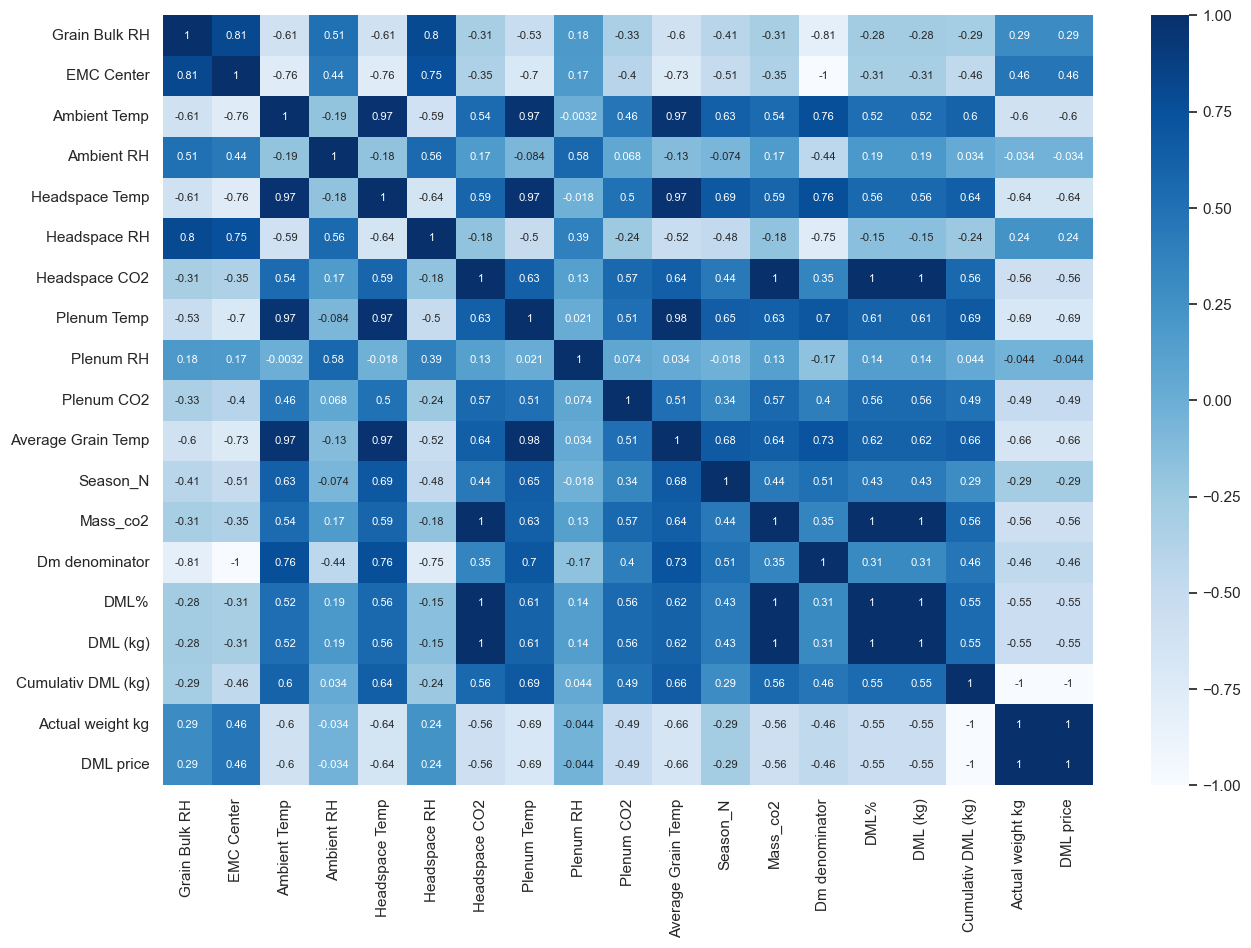

In [148]:
# droping columns we don't need
#del new_raw_data['CarName']

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(15,10)})

n_variables = list(raw_data.columns)

pc = raw_data[n_variables].corr(method ='pearson')

cols = n_variables

ax = sns.heatmap(pc, annot=True,
                 yticklabels=cols,
                 xticklabels=cols,
                 annot_kws={'size':8},
                 cmap="Blues")

### Feature Importance

Steps of Running Feature Importance

- Split the data into X & y

- Run a Tree-based estimators (i.e. decision trees & random forests)

- Run Feature Importance

- We measure the importance of a feature by calculating the increase in the model’s prediction error after permuting the feature

More info: https://christophm.github.io/interpretable-ml-book/feature-importance.html

In [149]:

# deleting for rerun
try:
    del final_fi
except:
    print("")

# Assuming `raw_data` is your DataFrame, and `y_column` is the target column
y_column='DML price'


scaler = MinMaxScaler()
# Separate features (X) and target (y)
X_dataframe= raw_data.drop([y_column], axis=1)
X_dataframe[list(X_dataframe.columns)] = scaler.fit_transform(X_dataframe[list(X_dataframe.columns)])
X = X_dataframe.values
y = raw_data[y_column].values  # Ensure y is in the correct format

# X_dataframe



print("Shape of X:", X.shape)
print("Shape of y:", y.shape)



Shape of X: (291, 18)
Shape of y: (291,)


In [150]:

# Initialize the Decision Tree Regressor
dt = DecisionTreeRegressor(
    random_state=42, 
    criterion='squared_error',  # Criterion for regression tasks
    max_depth=10                # Limit tree depth
)

# Train the model
dt.fit(X, y)

# Feature Importance Calculation
final_fi = pd.DataFrame()  # Initialize an empty DataFrame for storing feature importance
for i, column in enumerate(raw_data.drop([y_column], axis=1).columns):
    importance = dt.feature_importances_[i]
    print(f'Importance of feature {column}: {importance:.3f}')
    
    # Append feature importance to the DataFrame
    fi = pd.DataFrame({'Variable': [column], 'Feature Importance Score': [importance]})
    try:
        final_fi = pd.concat([final_fi, fi], ignore_index=True)
    except:
        final_fi = fi

# Ordering the feature importance data
final_fi = final_fi.sort_values('Feature Importance Score', ascending=False).reset_index(drop=True)

# Display the final feature importance DataFrame
print(final_fi)

Importance of feature Grain Bulk RH: 0.000
Importance of feature EMC Center: 0.000
Importance of feature Ambient Temp: 0.000
Importance of feature Ambient RH: 0.000
Importance of feature Headspace Temp: 0.001
Importance of feature Headspace RH: 0.000
Importance of feature Headspace CO2: 0.000
Importance of feature Plenum Temp: 0.000
Importance of feature Plenum RH: 0.000
Importance of feature Plenum CO2: 0.000
Importance of feature Average Grain Temp: 0.000
Importance of feature Season_N: 0.000
Importance of feature Mass_co2: 0.000
Importance of feature Dm denominator: 0.000
Importance of feature DML%: 0.000
Importance of feature DML (kg): 0.000
Importance of feature Cumulativ DML (kg): 0.097
Importance of feature Actual weight kg: 0.902
              Variable  Feature Importance Score
0     Actual weight kg                  0.901959
1   Cumulativ DML (kg)                  0.096584
2       Headspace Temp                  0.001153
3             DML (kg)                  0.000072
4      

## 10. Training & Running the regression model

In [152]:

#Spliting the data as 
X_train, X_test, Y_train, Y_test = train_test_split(X,y, test_size=0.2, random_state=42)


Gradient Boost algorithm 

Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 900}
Best cross-validation score: -0.54
Mean Squared Error: 0.3952
R² Score: 0.9999


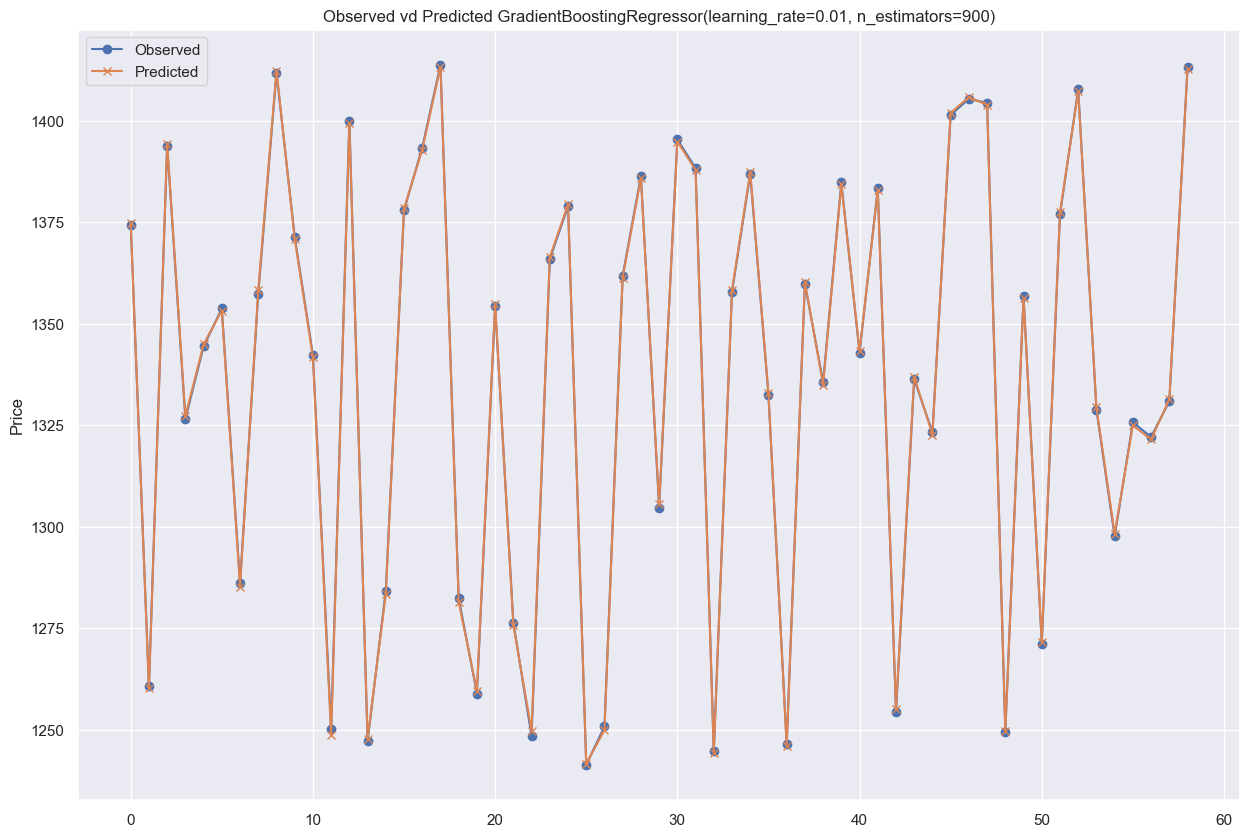

['Model_developed_GradientBoost_Regression.joblib']

In [153]:
# training and fitting the data
# ----------------------------------------------------------
#  1. GRADIENT BOOST ALGORITHM TRAINING
# ----------------------------------------------------------

#X_Validation, X_test, Y_Validation, Y_test = train_test_split(X_temp,Y_temp, test_size=0.5, random_state=0)

# Define the parameter grid (finding the hyperparamters)
param_grid = {
    'n_estimators': [ 600, 700, 800, 900, 1000, 1500, 2000, 5000],  # Number of boosting stages
    'learning_rate': [0.01, 0.002, 0.0005],  # Shrinks the contribution of each tree
    'max_depth': [3, 4, 5, 6]  # Maximum depth of the individual regression estimators
}

# Create a Gradient Boosting classifier
gbc = GradientBoostingRegressor()

# Set up GridSearchCV (Tuning of the hyperparameters)
grid_search = GridSearchCV(gbc, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, Y_train) 

# Best parameters and best cross-validation score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Evaluate on the test set with the best parameters
gbc_best = GradientBoostingRegressor(**grid_search.best_params_)
gbc_best.fit(X_train, Y_train)
y_test_pred = gbc_best.predict(X_test)


# Evaluate the model
mse = mean_squared_error(Y_test, y_test_pred)
r2 = r2_score(Y_test, y_test_pred)

print(f"Mean Squared Error: {mse:.4f}")
print(f"R² Score: {r2:.4f}")


plot_obs_pred(Y_test, y_test_pred, gbc_best, save=False)

model_filename = 'Model_developed_GradientBoost_Regression.joblib'
dump(gbc_best, model_filename)

Fitting 5 folds for each of 6480 candidates, totalling 32400 fits
Best parameters: {'bootstrap': False, 'max_depth': 15, 'max_features': 0.5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 26}
Best cross-validation score: 5.07
Test MSE: 2.6408
Test RMSE: 1.6251
Test R²: 0.9991


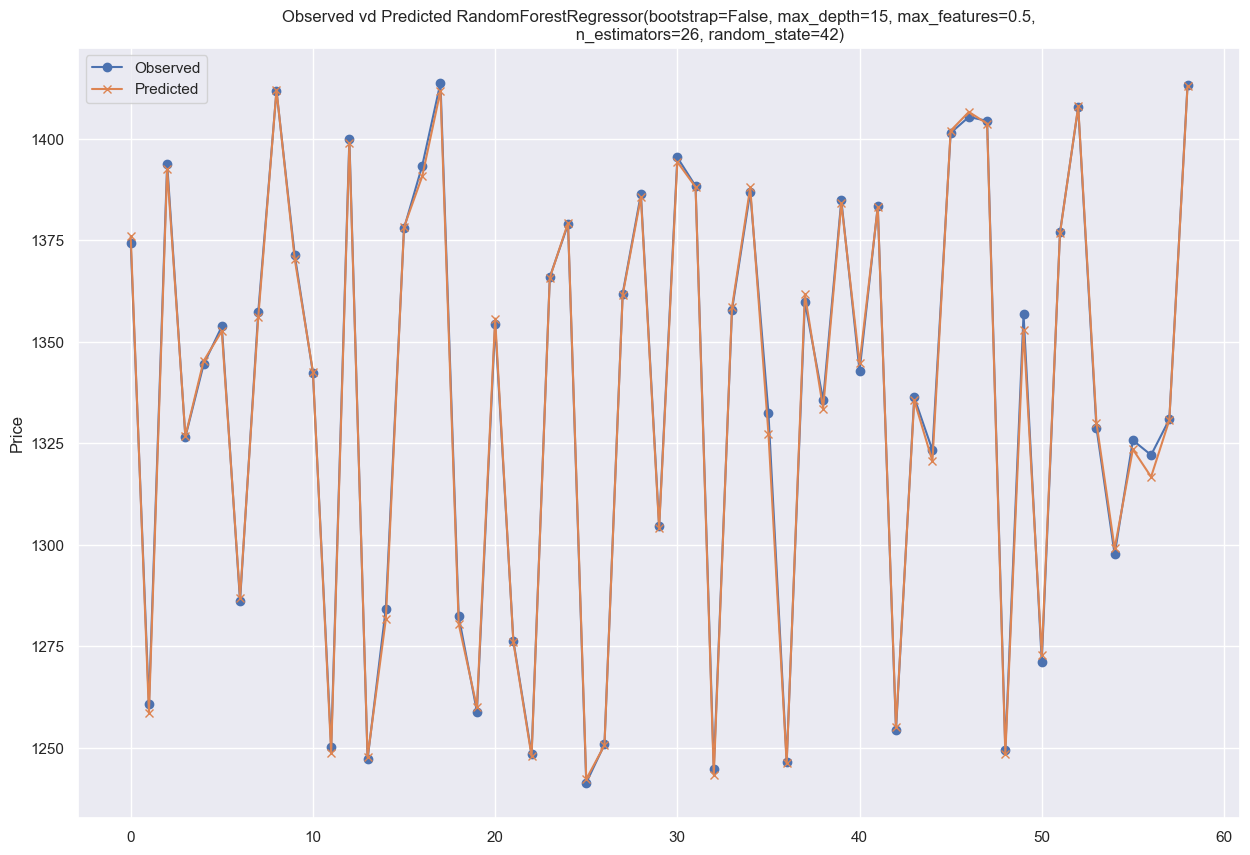

In [154]:
# training and fitting the data
# ----------------------------------------------------------
#    2. RANDOM FOREST ALGORITHM TRAINING
# ----------------------------------------------------------


# Hyperparameter grid
n_estimators = [int(x) for x in np.linspace(start=5, stop=200, num=10)]
max_features = [0.5, 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(5, 110, num=11)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

# {'bootstrap': True, 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 20}

param_grid = {
    'n_estimators': n_estimators,
    'max_features': max_features,
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf,
    'bootstrap': bootstrap,
}

# Initialize the RandomForestRegressor
rfc = RandomForestRegressor(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(
    estimator=rfc,
    param_grid=param_grid,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    verbose=2
)

# Fit GridSearchCV
grid_search.fit(X_train, Y_train)

# Best parameters and cross-validation score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(-grid_search.best_score_))  # MSE is negative

# Evaluate on the test set with the best parameters
rfc_best = RandomForestRegressor(**grid_search.best_params_, random_state=42)
rfc_best.fit(X_train, Y_train)
y_test_pred = rfc_best.predict(X_test)

# Model evaluation
mse = mean_squared_error(Y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_test_pred)

print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test R²: {r2:.4f}")


plot_obs_pred(Y_test, y_test_pred, rfc_best, save=False)
# ****************************************************************************************************
# ****************************************************************************************************
# ****************************************************************************************************


In [155]:
# # training and fitting the data
#  # train random forest training algorithm

# save the model to a file #GBC means GradientBoostingClassifier algorithm

model_filename = 'Model_developed_RandomForestRegression.joblib'
dump(rfc_best, model_filename)


['Model_developed_RandomForestRegression.joblib']

Best parameters: {'criterion': 'friedman_mse', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2}
Best cross-validation score: -3.28
Test MSE: 1.2424
Test RMSE: 1.1146


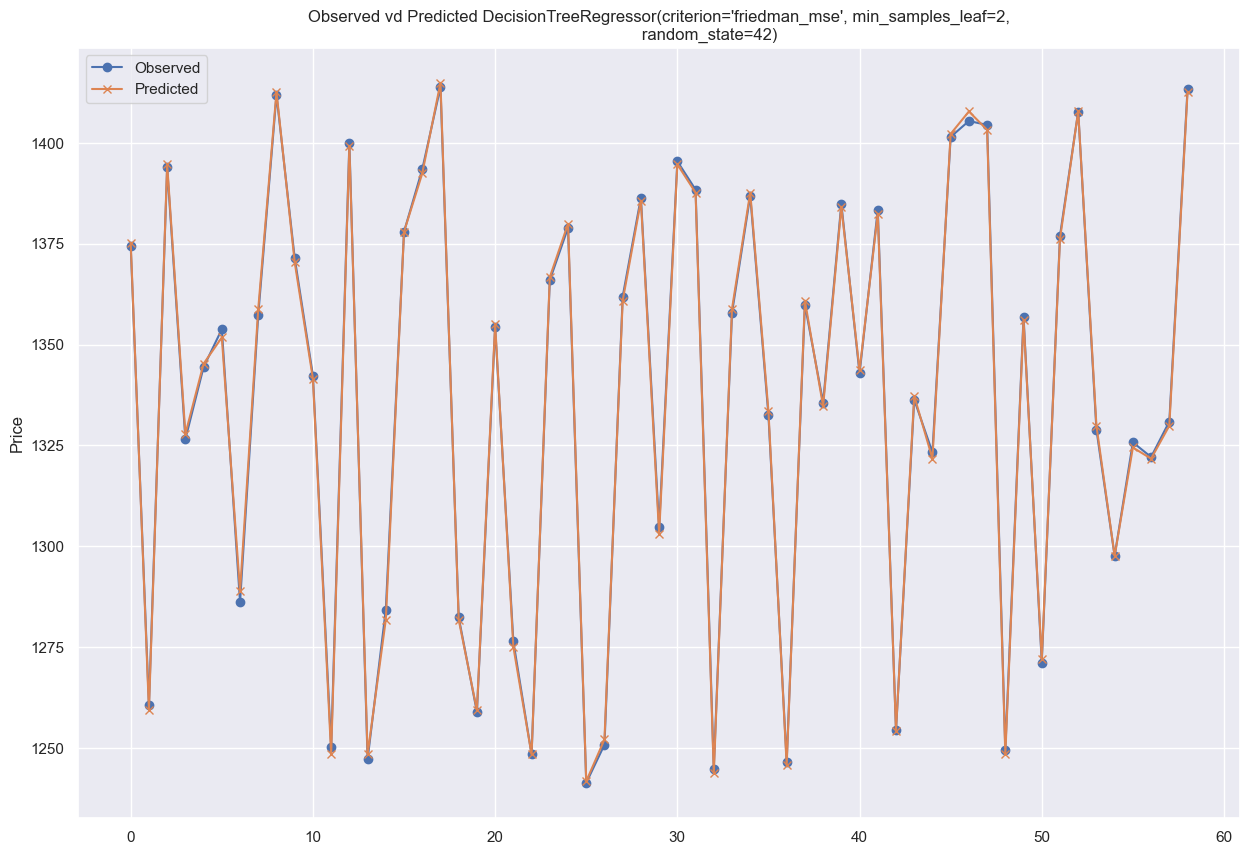

['Model_developed_Decision_TreeRegression.joblib']

In [156]:
# training and fitting the data
# ----------------------------------------------------------
#    3. DECISION TREE CLASSIFIER ALGORITHM TRAINING
# ----------------------------------------------------------

# Define the parameter grid
param_grid = {
'max_depth': [None, 10, 20, 30, 40], # Maximum depth of the tree
'min_samples_split': [2, 5, 10], # Minimum number of samples required to split a node
'min_samples_leaf': [1, 2, 4], # Minimum number of samples required at a leaf node
'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'] # Function to measure the quality of a split
}

# Create a Decision Tree classifier
dt = DecisionTreeRegressor(random_state=42)

# Set up GridSearchCV
grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, Y_train)

# Best parameters and best cross-validation score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Evaluate on the test set with the best parameters
dt_best = DecisionTreeRegressor(**grid_search.best_params_, random_state=42)
dt_best.fit(X_train, Y_train)
y_test_pred = dt_best.predict(X_test)


# Model evaluation
mse = mean_squared_error(Y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_test_pred)

print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test R²: {r2:.4f}")


plot_obs_pred(Y_test, y_test_pred, dt_best, save=False)

model_filename = 'Model_developed_Decision_TreeRegression.joblib'
dump(dt_best, model_filename)



Best parameters: {'C': 100, 'gamma': 'scale', 'kernel': 'linear'}
Best cross-validation score: 1.00
Test MSE: 0.0031
Test RMSE: 0.0560


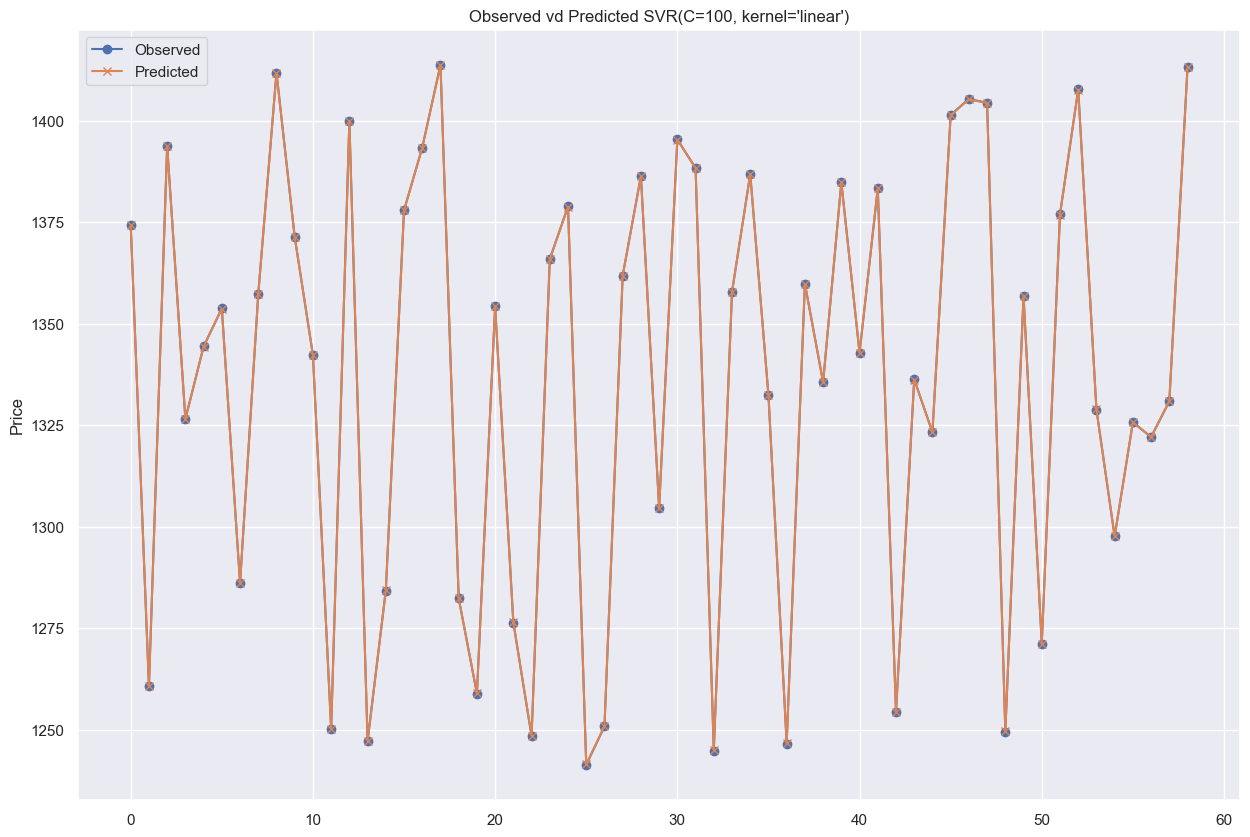

In [157]:
# training and fitting the data
# ----------------------------------------------------------
#   4. SVM CLASSIFIER ALGORITHM TRAINING
# ----------------------------------------------------------


# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': ['scale','auto'], 
              'kernel': ['rbf','poly', 'linear','sigmoid']}  
svm=SVR()
grid_search = GridSearchCV(svm, param_grid, cv=5) 
  
# fitting the model for grid search 
grid_search.fit(X_train, Y_train) 

print("Best parameters:", grid_search.best_params_) 
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_)) # Evaluate on the test set with the best parameters 

svm_best = SVR(**grid_search.best_params_) 
svm_best.fit(X_train, Y_train) 
y_test_pred = svm_best.predict(X_test) 

# Model evaluation
mse = mean_squared_error(Y_test, y_test_pred)
rmse = np.sqrt(mse)
r2 = r2_score(Y_test, y_test_pred)

print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test R²: {r2:.4f}")


plot_obs_pred(Y_test, y_test_pred, svm_best, save=False)

In [158]:
model_filename = 'Model_developed_SVR.joblib'
dump(svm_best, model_filename)



['Model_developed_SVR.joblib']

In [159]:
# --------------------------------------------------------------------------------------------------------------------------------------------------------
# 
#       ENDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDD 
#         ENDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDD 
#           ENDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDD 
#               ENDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDDD 
# ------------------------------------------------------------------------------------------------------------------------------------------------------------


: 